#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 220129254

# Student name: Alina Kriutchenko

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r"D:\720\2\weather_dataset.csv")
data.head()

#Replace the string type to numerical in the precip_type column, (run only once):
data['precip_type'].replace({'rain': 1, 'snow': 0}, inplace=True)

feature_cols = ['recording_date_time', 'precip_type', 'apparent_temperature', 'humidity', 'wind_speed', 'wind_bearing', 'visibility', 'cloud_cover', 'pressure']
X = data[feature_cols].values
Y = data.temperature.values

#print the shape:
print (X.shape)
print (Y.shape)

(96453, 9)
(96453,)


In [3]:
#Train:test split -> 80:20

Xtrain = X[:78909]
Ytrain = Y[:78909]

#exclude recording_date_time column from train dataset:
Xtrain = np.delete(Xtrain, 0, axis=1)

Xtest = X[78909:]
Ytest = Y[78909:]

#exclude recording_date_time column from test dataset:
Xtest = np.delete(Xtest, 0, axis=1)

#Displaying the shape of training and test sets:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(78909, 8)
(78909,)
(17544, 8)
(17544,)


2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

In [4]:
# Import: 
from scipy.stats import pearsonr 
  
# Convert dataframe into series 
temperature = data['temperature'] 
precip_type = data['precip_type'] 
apparent_temperature = data['apparent_temperature'] 
humidity = data['humidity'] 
wind_speed = data['wind_speed'] 
wind_bearing = data['wind_bearing'] 
visibility = data['visibility'] 
cloud_cover = data['cloud_cover'] 
pressure = data['pressure'] 

#Finding the Pearsom correlation in relation to the temperature:
corrT1, _ = pearsonr(temperature, precip_type) 
corrT2, _ = pearsonr(temperature, apparent_temperature) 
corrT3, _ = pearsonr(temperature, humidity) 
corrT4, _ = pearsonr(temperature, wind_speed) 
corrT5, _ = pearsonr(temperature, wind_bearing) 
corrT6, _ = pearsonr(temperature, visibility) 
corrT7, _ = pearsonr(temperature, cloud_cover) 
corrT8, _ = pearsonr(temperature, pressure) 
print('Pearsons correlation with the precip_type: %.3f' % corrT1)
print('Pearsons correlation with the apparent_temperature: %.3f' % corrT2)
print('Pearsons correlation with the humidity: %.3f' % corrT3)
print('Pearsons correlation with the wind_speed: %.3f' % corrT4)
print('Pearsons correlation with the wind_bearing: %.3f' % corrT5)
print('Pearsons correlation with the visibility: %.3f' % corrT6)
print('Pearsons correlation with the cloud_cover: %.3f' % corrT7)
print('Pearsons correlation with the pressure: %.3f' % corrT8)

Pearsons correlation with the precip_type: 0.554
Pearsons correlation with the apparent_temperature: 0.993
Pearsons correlation with the humidity: -0.632
Pearsons correlation with the wind_speed: 0.009
Pearsons correlation with the wind_bearing: 0.030
Pearsons correlation with the visibility: 0.393
Pearsons correlation with the cloud_cover: nan
Pearsons correlation with the pressure: -0.005


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [5]:
print('''
The insignificant features for predicting the temperature are wind_speed, wind_bearing and especially pressure.
This conclusion made based on the Pearsons correlation result.
It is close to zero which means almost no relationship between these three features and the temperature.
''')


The insignificant features for predicting the temperature are wind_speed, wind_bearing and especially pressure.
This conclusion made based on the Pearsons correlation result.
It is close to zero which means almost no relationship between these three features and the temperature.



In [6]:
#Check the precip_type values
print(data['cloud_cover'].unique())
print('The cloud cover feature contain only zeros, which means that the sky is never fully cloud.')
print('Therefore, there is no relationship between cloud_cover and temperature')

[0]
The cloud cover feature contain only zeros, which means that the sky is never fully cloud.
Therefore, there is no relationship between cloud_cover and temperature


The visual representation shows the observations as a Pearsons correlation.

The presure, cloud_cover have no relationship with the predicted variable since
the presure, cloud_cover do not show any changes with the changes of the temperature.



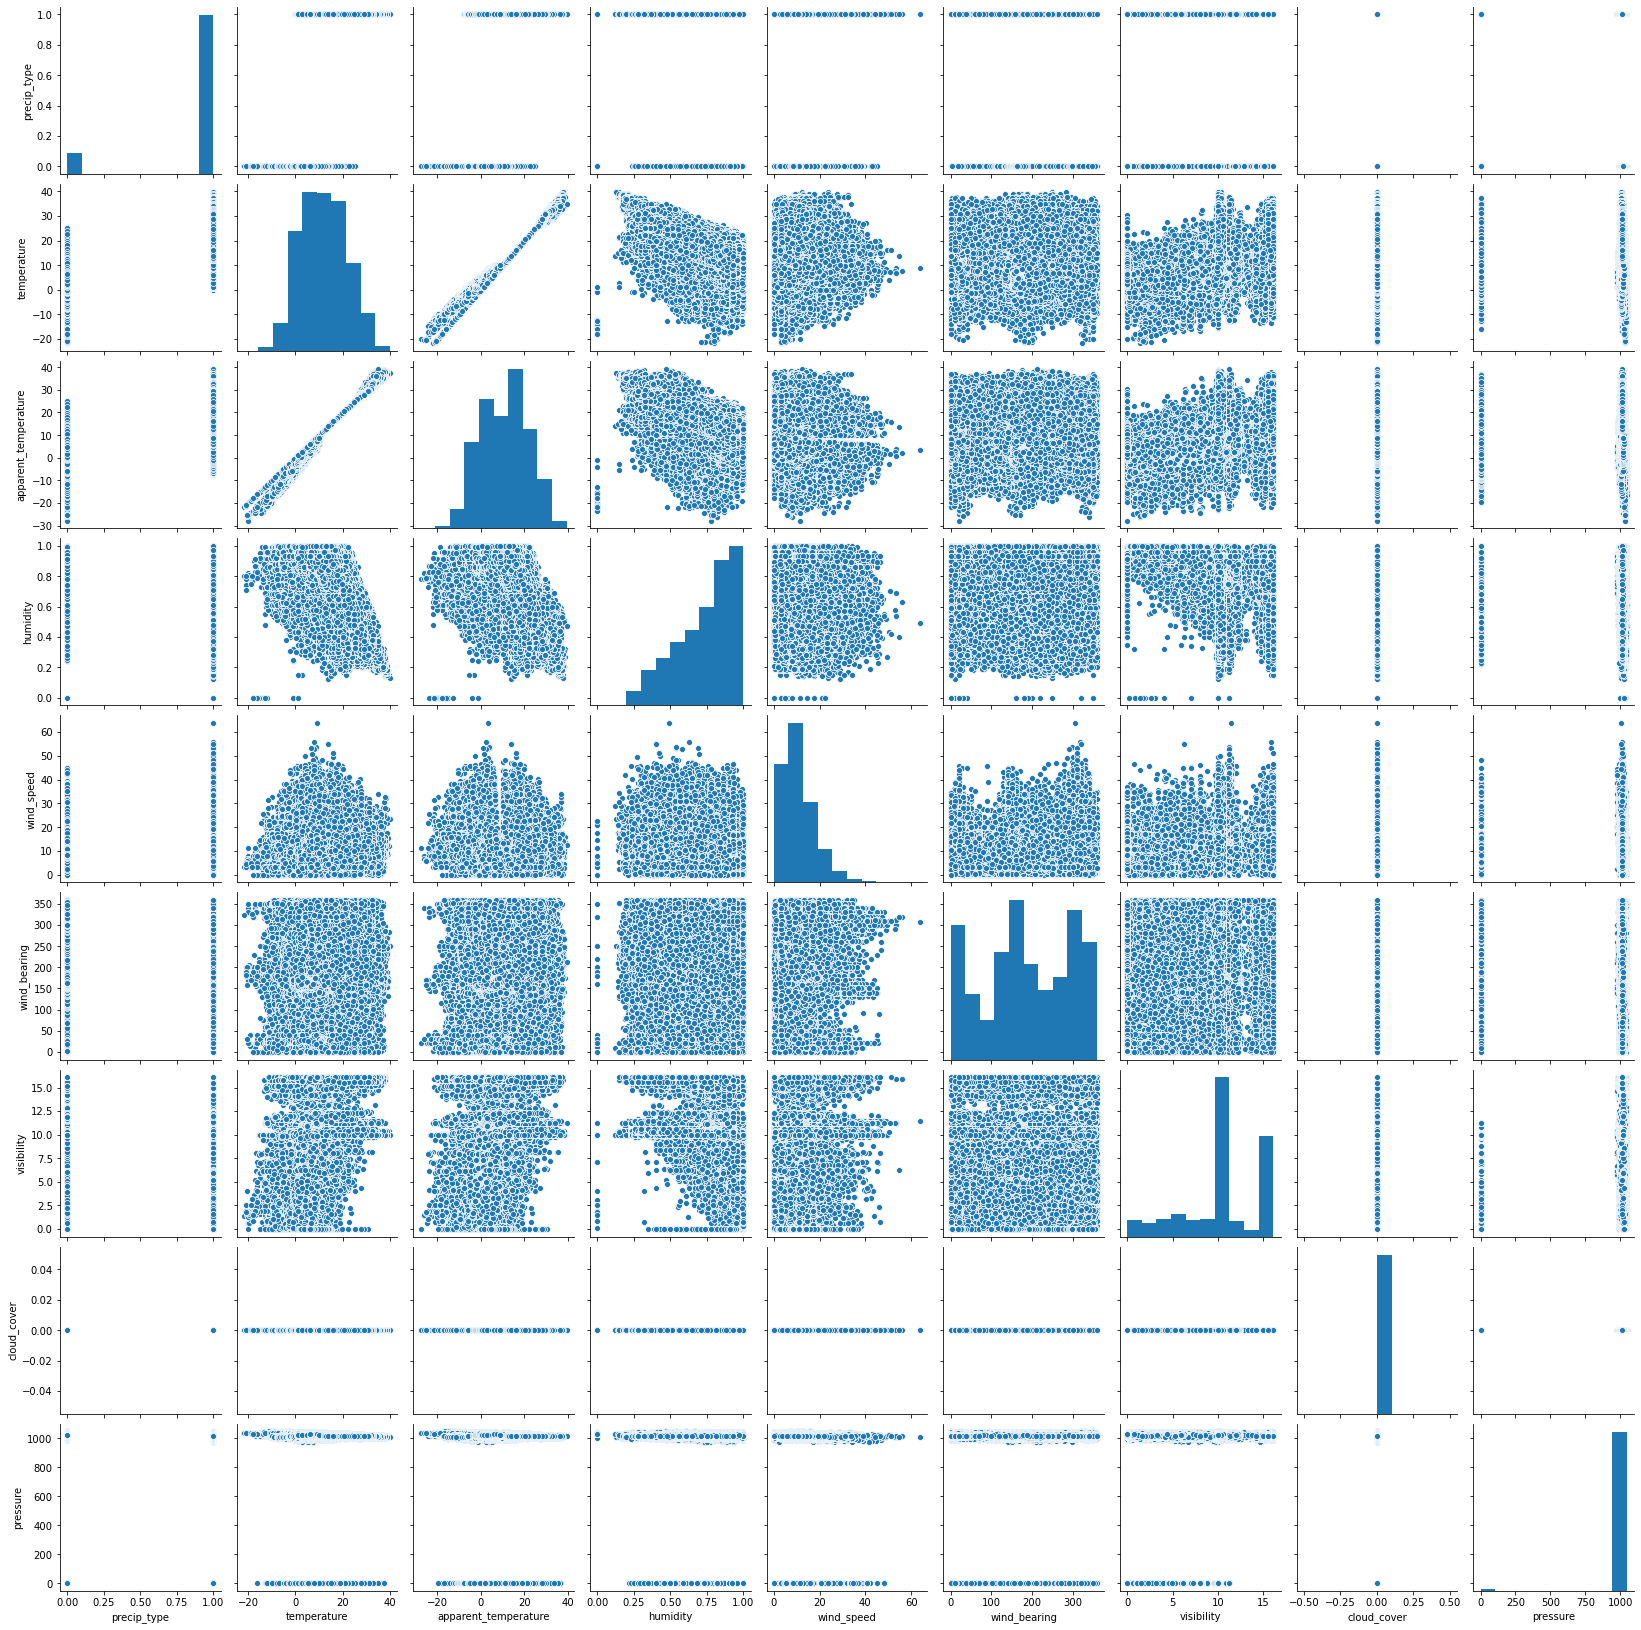

In [7]:
#Import seaborn
import seaborn as sns
#Plot a pairwise relationships in the dataset:
sns.pairplot(data)
print('''The visual representation shows the observations as a Pearsons correlation.

The presure, cloud_cover have no relationship with the predicted variable since
the presure, cloud_cover do not show any changes with the changes of the temperature.
''')

3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [8]:
#Exclude wind_speed, wind_bearing and especially pressure and cloud cover columns from the train dataset, (run only once):
Xtrain = np.delete(Xtrain, [3,4,6,7], axis=1)


#Exclude wind_speed, wind_bearing and especially pressure and cloud cover columns from the test dataset, (run only once):
Xtest = np.delete(Xtest, [3,4,6,7], axis=1)

#Displaying the shape of training and test sets:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(78909, 4)
(78909,)
(17544, 4)
(17544,)


In [26]:
#Import
from sklearn.linear_model import LinearRegression

#Linear regression:
my_model = LinearRegression()

#Fit the model using the data
my_model.fit(Xtrain, Ytrain)

LinearRegression()

In [27]:
#Define ypredicts:
ypredicts = my_model.predict(Xtest)

print('The predicted temperature: ')
print(ypredicts)
print('The true temperature: ')
print(Ytest)
print('')
print('The predicted temperature is slightly higher than the true temperature')
#np.set_printoptions(threshold=np.inf)

The predicted temperature: 
[12.17004657 12.38941685  9.03050301 ... 22.02334786 21.47318122
 20.5201885 ]
The true temperature: 
[11.02 10.99  9.87 ... 22.04 21.52 20.44]

The predicted temperature is slightly higher than the true temperature


In [28]:
#Print regression coefficients and intercept:
print("Regression coefficients: ", my_model.coef_)
print("Intercept: ", my_model.intercept_)

#Import:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

#Define:
ypredicts_train = my_model.predict(Xtrain)
ypredicts_test = my_model.predict(Xtest)

#Calculate the errors:

print('')
#The mean squared error
print('Mean squared error (train): %.2f' % mean_squared_error(Ytrain, ypredicts_train))
print('Mean squared error (test): %.2f' % mean_squared_error(Ytest, ypredicts_test))
print('')
#The mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytrain, ypredicts_train))  
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, ypredicts_test))
print('')
#The root mean absolute error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytrain, ypredicts_train)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, ypredicts_test)))

Regression coefficients:  [ 0.32887357  0.8487539  -2.72036552  0.01574975]
Intercept:  4.257772171913982

Mean squared error (train): 1.21
Mean squared error (test): 0.94

Mean Absolute Error: 0.8409983168164004
Mean Absolute Error: 0.7631851268626558

Root Mean Squared Error: 1.100436253835676
Root Mean Squared Error: 0.9718770619204501


In [29]:
print('''The mean change for the precip_type, apparent_temperature, humidity and visibility 
for one unit of the change in the temperature is 0.32887357, 0.8487539, -2.72036552 and 0.01574975 respectively.

The MAE or difference between actual values and predicted is relatively small.

The expected mean value of the temperature when all feature are equal to zero is 4.257772171913982.
Based on the MSE, the test dataset generalised the data better than the train dataset.
''')

The mean change for the precip_type, apparent_temperature, humidity and visibility 
for one unit of the change in the temperature is 0.32887357, 0.8487539, -2.72036552 and 0.01574975 respectively.

The MAE or difference between actual values and predicted is relatively small.

The expected mean value of the temperature when all feature are equal to zero is 4.257772171913982.
Based on the MSE, the test dataset generalised the data better than the train dataset.



4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

In [30]:
#Finding the Pearsom correlation in relation to the pressure:
corrP1, _ = pearsonr(pressure, precip_type) 
corrP2, _ = pearsonr(pressure, apparent_temperature) 
corrP3, _ = pearsonr(pressure, temperature) 
corrP4, _ = pearsonr(pressure, humidity) 
corrP5, _ = pearsonr(pressure, wind_speed) 
corrP6, _ = pearsonr(pressure, wind_bearing) 
corrP7, _ = pearsonr(pressure, visibility) 
corrP8, _ = pearsonr(pressure, cloud_cover) 

#Finding the Pearson correlation in relation to the pressure:
print('Pearsons correlation with the precip_type: %.3f' % corrP1)
print('Pearsons correlation with the apparent_temperature: %.3f' % corrP2)
print('Pearsons correlation with the temperature: %.3f' % corrP3)
print('Pearsons correlation with the humidity: %.3f' % corrP4)
print('Pearsons correlation with the wind_speed: %.3f' % corrP5)
print('Pearsons correlation with the wind_bearing: %.3f' % corrP6)
print('Pearsons correlation with the visibility: %.3f' % corrP7)
print('Pearsons correlation with the cloud_cover: %.3f' % corrP8)
print('')
print('The visibility shows maximum correlation with the "pressure" which equal to: ', corrP7)

Pearsons correlation with the precip_type: -0.011
Pearsons correlation with the apparent_temperature: -0.000
Pearsons correlation with the temperature: -0.005
Pearsons correlation with the humidity: 0.005
Pearsons correlation with the wind_speed: -0.049
Pearsons correlation with the wind_bearing: -0.012
Pearsons correlation with the visibility: 0.060
Pearsons correlation with the cloud_cover: nan

The visibility shows maximum correlation with the "pressure" which equal to:  0.05982620828433801


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [31]:
#Create X2 and Y2 for prediction of temperature by visibility and pressure:
feature_cols_2 = ['visibility', 'pressure']
X2 = data[feature_cols_2].values
Y2 = data.temperature.values

#print the shape:
print (X2.shape)
print (Y2.shape)

(96453, 2)
(96453,)


In [32]:
#Train_2:test_2 split -> 80:20

Xtrain2 = X2[:78909]
Ytrain2 = Y2[:78909]

Xtest2 = X2[78909:]
Ytest2 = Y2[78909:]

#Displaying the shape of training 2 and test 2 sets:
print(Xtrain2.shape)
print(Ytrain2.shape)
print(Xtest2.shape)
print(Ytest2.shape)

(78909, 2)
(78909,)
(17544, 2)
(17544,)


In [33]:
#The model for prediction of temperature by visibility and pressure:
my_model2 = LinearRegression()

#Fit the model using the data
my_model2.fit(Xtrain2, Ytrain2)

LinearRegression()

In [34]:
#Define:
ypredicts2 = my_model2.predict(Xtest2)

print('The predicted temperature 2: ')
print(ypredicts2)
print('')
print('The true temperature 2: ')
print(Ytest2)
print('')
print('The predicted temperature is slightly smaller than in the previous model')

The predicted temperature 2: 
[11.94574457 11.94406162 15.62928099 ... 17.13416513 17.13348728
 16.6151313 ]

The true temperature 2: 
[11.02 10.99  9.87 ... 22.04 21.52 20.44]

The predicted temperature is slightly smaller than in the previous model


In [35]:
#Calculate the errors for the Model 2
#Print the regression coefficients 2 and intercept 2:
print("Regression coefficients 2: ", my_model2.coef_)
print("Intercept 2: ", my_model2.intercept_)

#Define:
ypredicts_train2 = my_model2.predict(Xtrain2)
ypredicts_test2 = my_model2.predict(Xtest2)

#Calculate the errors:


print('')
#The mean squared error
print('Mean squared error 2 (train): %.2f' % mean_squared_error(Ytrain2, ypredicts_train2))
print('Mean squared error 2 (test): %.2f' % mean_squared_error(Ytest2, ypredicts_test2))
print('')
#The mean absolute error
print('Mean Absolute Error 2 (train):', metrics.mean_absolute_error(Ytrain2, ypredicts_train2))  
print('Mean Absolute Error 2 (test):', metrics.mean_absolute_error(Ytest2, ypredicts_test2))
print('')
#The root mean absolute error
print('Root Mean Squared Error 2 (train):', np.sqrt(metrics.mean_squared_error(Ytrain2, ypredicts_train2)))
print('Root Mean Squared Error 2 (test):', np.sqrt(metrics.mean_squared_error(Ytest2, ypredicts_test2)))

Regression coefficients 2:  [ 0.8928709  -0.00233743]
Intercept 2:  5.1329775658016175

Mean squared error 2 (train): 79.83
Mean squared error 2 (test): 64.77

Mean Absolute Error 2 (train): 7.233248435527317
Mean Absolute Error 2 (test): 6.498840791843141

Root Mean Squared Error 2 (train): 8.934663173495972
Root Mean Squared Error 2 (test): 8.047821388326952


In [36]:
#The first model:
#
#Regression coefficients:  [ 0.32887357  0.8487539  -2.72036552  0.01574975]
#Intercept:  4.257772171913982
#
#Mean squared error (train): 1.21
#Mean squared error (test): 0.94
#
#Mean Absolute Error: 0.8409983168164004
#Mean Absolute Error: 0.7631851268626558
#
#Root Mean Squared Error: 1.100436253835676
#Root Mean Squared Error: 0.9718770619204501


In [37]:
print('''The second model has the highest and the lowest regression coefficient amongst both models. 
The lowest regression coefficient is expected since the pressure has a very week relationship with the temperature.

Therefore, the mean change of the any feature of the first model for one unit of the change in the temperature 
is more balanced in comparison to the second model, where it repsents both extremes.

MSE is smaller for the first model since it closer to zero.
MAE is better for the first model since it closer to zero.
RMSE is significantly smaller for the first model.
Therefore, the first model is a better fit.
''')    


The second model has the highest and the lowest regression coefficient amongst both models. 
The lowest regression coefficient is expected since the pressure has a very week relationship with the temperature.

Therefore, the mean change of the any feature of the first model for one unit of the change in the temperature 
is more balanced in comparison to the second model, where it repsents both extremes.

MSE is smaller for the first model since it closer to zero.
MAE is better for the first model since it closer to zero.
RMSE is significantly smaller for the first model.
Therefore, the first model is a better fit.



5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [38]:
#Create feature_cols_3 for X3 without with all features(considering overfittin scenario) beside the temperature:
feature_cols_3 = ['precip_type', 'apparent_temperature', 'humidity', 'wind_speed', 'wind_bearing', 'visibility', 'cloud_cover', 'pressure']

#Create X3 and Y3 for prediction of temperature:
X3 = data[feature_cols_3].values
Y3 = data.temperature.values

#print the shape:
print (X3.shape)
print (Y3.shape)

(96453, 8)
(96453,)


In [39]:
#Train_3:test_3 split -> 40:60

Xtrain3 = X3[:38581]
Ytrain3 = Y3[:38581]

Xtest3 = X3[38581:]
Ytest3 = Y3[38581:]

#Displaying the shape of training 3 and test 3 sets:
print(Xtrain3.shape)
print(Ytrain3.shape)
print(Xtest3.shape)
print(Ytest3.shape)

(38581, 8)
(38581,)
(57872, 8)
(57872,)


In [40]:
#The model 3 for prediction of temperature:
my_model3 = LinearRegression()

#Fit the model 3 using the data
my_model3.fit(Xtrain3, Ytrain3)

LinearRegression()

In [41]:
#Define:
ypredicts3 = my_model3.predict(Xtest3)
print('')
print('The predicted temperature 3: ')
print(ypredicts3)
print('')
print('The true temperature 3: ')
print(Ytest3)
print('')
print('The temperature is signifcantly different than in the previous model.')


The predicted temperature 3: 
[-3.48180484 -4.82031042 -4.9353084  ... 21.82082427 21.44603359
 20.07335702]

The true temperature 3: 
[-2.73 -3.76 -3.83 ... 22.04 21.52 20.44]

The temperature is signifcantly different than in the previous model.


In [42]:
#The predicted temperature: 
#[12.17004657 12.38941685  9.03050301 ... 22.02334786 21.47318122
# 20.5201885 ]
#The true temperature: 
#[11.02 10.99  9.87 ... 22.04 21.52 20.44]


#The predicted temperature 2: 
#[11.94574457 11.94406162 15.62928099 ... 17.13416513 17.13348728
# 16.6151313 ]
#The true temperature 2: 
#[11.02 10.99  9.87 ... 22.04 21.52 20.44]

In [43]:
#pritn the regression coefficients 3 and intecept 3:
print("Regression coefficients 3: ", my_model3.coef_)
print("Intercept 3: ", my_model3.intercept_)

#Define:
ypredicts_train3 = my_model3.predict(Xtrain3)
ypredicts_test3 = my_model3.predict(Xtest3)

#Calculate the errors for the Model 3:
print('')
#The mean squared error
print('Mean squared error 3 (train): %.2f' % mean_squared_error(Ytrain3, ypredicts_train3))
print('Mean squared error 3 (test): %.2f' % mean_squared_error(Ytest3, ypredicts_test3))
print('')
#The mean absolute error
print('Mean Absolute Error 3 (train):', metrics.mean_absolute_error(Ytrain3, ypredicts_train3))  
print('Mean Absolute Error 3 (test):', metrics.mean_absolute_error(Ytest3, ypredicts_test3))
print('')
#The root mean absolute error
print('Root Mean Squared Error 3 (train):', np.sqrt(metrics.mean_squared_error(Ytrain3, ypredicts_train3)))
print('Root Mean Squared Error 3 (test):', np.sqrt(metrics.mean_squared_error(Ytest3, ypredicts_test3)))

Regression coefficients 3:  [-1.96278840e-02  8.72356768e-01 -1.47981082e+00  8.86809868e-02
 -5.66437263e-05  3.95547094e-03  0.00000000e+00  1.82949043e-05]
Intercept 3:  2.565482618064898

Mean squared error 3 (train): 0.94
Mean squared error 3 (test): 0.89

Mean Absolute Error 3 (train): 0.7534958216772125
Mean Absolute Error 3 (test): 0.7331198184144943

Root Mean Squared Error 3 (train): 0.969438219059291
Root Mean Squared Error 3 (test): 0.9408541475363401


In [44]:
#The first model:
#
#Regression coefficients:  [ 0.32887357  0.8487539  -2.72036552  0.01574975]
#Intercept:  4.257772171913982
#
#Mean squared error (train): 1.21
#Mean squared error (test): 0.94
#
#Mean Absolute Error: 0.8409983168164004
#Mean Absolute Error: 0.7631851268626558
#
#Root Mean Squared Error: 1.100436253835676
#Root Mean Squared Error: 0.9718770619204501

#

#Regression coefficients 2:  [ 0.8928709  -0.00233743]
#Intercept 2:  5.1329775658016175

#Mean squared error 2 (train): 79.83
#Mean squared error 2 (test): 64.77

#Mean Absolute Error 2 (train): 7.233248435527317
#Mean Absolute Error 2 (test): 6.498840791843141

#Root Mean Squared Error 2 (train): 8.934663173495972
#Root Mean Squared Error 2 (test): 8.047821388326952


In [45]:
print('''
Based on the intercept value, the expected value of the temperature is lower for the model 3 
when all other feature equal to zero.

MSE is smaller for the third model in comparison to the first and second models.
This is not necessarily good and can indicate an overfitting.
MAE is smaller for the third model in comparison to the first and second models.
RMSE is smaller for the third model in comparison to the first and second models.
The coefficient of the model are high and require a regulariser.
''')


Based on the intercept value, the expected value of the temperature is lower for the model 3 
when all other feature equal to zero.

MSE is smaller for the third model in comparison to the first and second models.
This is not necessarily good and can indicate an overfitting.
MAE is smaller for the third model in comparison to the first and second models.
RMSE is smaller for the third model in comparison to the first and second models.
The coefficient of the model are high and require a regulariser.



In [46]:
#Regularised linear regression models

In [47]:
#The ridge regression

#Import modules:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [48]:
#RMSE and R-squared values for the Ridge Regression model on the training data:
#Fitting:
ridge_r = Ridge(alpha=0.03)
ridge_r.fit(Xtrain3, Ytrain3) 

#Predict:
pred_train_rr= ridge_r.predict(Xtrain3)
pred_test_rr= ridge_r.predict(Xtest3)

#RMSE and R-squared values for the Ridge Regression model on the training data:
RMSE_train_ridge = np.sqrt(mean_squared_error(Ytrain3,pred_train_rr))
Rsquared_train_ridge = r2_score(Ytrain3, pred_train_rr)
MSE_train_ridge = mean_squared_error(Ytrain3,pred_train_rr)

#RMSE and R-squared values for the Ridge Regression model on the test data:
RMSE_test_ridge = np.sqrt(mean_squared_error(Ytest3,pred_test_rr))
Rsquared_test_ridge = r2_score(Ytest3, pred_test_rr)
MSE_test_ridge = mean_squared_error(Ytest3, pred_test_rr)


In [49]:
print("The RMSE for the train data is", RMSE_train_ridge)
print("The The R-squared for the train data is", Rsquared_train_ridge)
print("The MSE for the train data is", MSE_train_ridge)
print("The RMSE for the test data is", RMSE_test_ridge)
print("The The R-squared for the test data is", Rsquared_test_ridge)
print("The MSE for the train data is", MSE_test_ridge)

The RMSE for the train data is 0.9694382190958695
The The R-squared for the train data is 0.9900020469525529
The MSE for the train data is 0.9398104606437709
The RMSE for the test data is 0.9408540194323842
The The R-squared for the test data is 0.9900738966709964
The MSE for the train data is 0.8852062858820732


In [50]:
#Lasso regression

#Import module:
from sklearn.linear_model import Lasso

In [77]:
#RMSE and R-squared values for the Lasso Regression model on the training data:
#Fitting:
model_lasso = Lasso(alpha=0.05)
model_lasso.fit(Xtrain3, Ytrain3) 

#Predict:
pred_train_lasso= model_lasso.predict(Xtrain3)
pred_test_lasso= model_lasso.predict(Xtest3)

#RMSE and R-squared values for the Lasso Regression model on the train data:
RMSE_train_lasso = np.sqrt(mean_squared_error(Ytrain3,pred_train_lasso))
Rsquared_train_lasso = r2_score(Ytrain3, pred_train_lasso)
MSE_train_lasso = mean_squared_error(Ytrain3, pred_train_lasso)

#RMSE and R-squared values for the Lasso Regression model on the test data:
RMSE_test_lasso = np.sqrt(mean_squared_error(Ytest3,pred_test_lasso))
Rsquared_test_lasso = r2_score(Ytest3, pred_test_lasso)
MSE_test_lasso = mean_squared_error(Ytest3, pred_test_lasso)

In [52]:
print("The RMSE for the train data is", RMSE_train_lasso)
print("The The R-squared for the train data is", Rsquared_train_lasso)
print("The MSE for the train data is", MSE_train_lasso)
print("The RMSE for the test data is", RMSE_test_lasso)
print("The The R-squared for the test data is", Rsquared_test_lasso)
print("The MSE for the train data is", MSE_test_lasso)

The RMSE for the train data is 0.9917359429147363
The The R-squared for the train data is 0.9895368385899103
The MSE for the train data is 0.9835401804689812
The RMSE for the test data is 0.9643238831276567
The The R-squared for the test data is 0.9895725012012833
The MSE for the train data is 0.9299205515704024


In [53]:
#Compare:

print('Linear regression:')
print('''
Mean squared error 3 (train): 0.94
Mean squared error 3 (test): 0.89

Mean Absolute Error 3 (train): 0.7534958216772125
Mean Absolute Error 3 (test): 0.7331198184144943

Root Mean Squared Error 3 (train): 0.969438219059291
Root Mean Squared Error 3 (test): 0.9408541475363401
''')
print('')
print('Ridge regression:')
print('''
The RMSE for the train data is 0.9694382190958695
The The R-squared for the train data is 0.9900020469525529
The MSE for the train data is 0.9398104606437709

The RMSE for the test data is 0.9408540194323842
The The R-squared for the test data is 0.9900738966709964
The MSE for the train data is 0.8852062858820732
''')
print('')
print('Lasso regression:')
print('''
The RMSE for the train data is 0.9917359429147363
The The R-squared for the train data is 0.9895368385899103
The MSE for the train data is 0.9835401804689812

The RMSE for the test data is 0.9643238831276567
The The R-squared for the test data is 0.9895725012012833
The MSE for the train data is 0.9299205515704024
''')



Linear regression:

Mean squared error 3 (train): 0.94
Mean squared error 3 (test): 0.89

Mean Absolute Error 3 (train): 0.7534958216772125
Mean Absolute Error 3 (test): 0.7331198184144943

Root Mean Squared Error 3 (train): 0.969438219059291
Root Mean Squared Error 3 (test): 0.9408541475363401


Ridge regression:

The RMSE for the train data is 0.9694382190958695
The The R-squared for the train data is 0.9900020469525529
The MSE for the train data is 0.9398104606437709

The RMSE for the test data is 0.9408540194323842
The The R-squared for the test data is 0.9900738966709964
The MSE for the train data is 0.8852062858820732


Lasso regression:

The RMSE for the train data is 0.9917359429147363
The The R-squared for the train data is 0.9895368385899103
The MSE for the train data is 0.9835401804689812

The RMSE for the test data is 0.9643238831276567
The The R-squared for the test data is 0.9895725012012833
The MSE for the train data is 0.9299205515704024



In [54]:
# Explain the reason behind the performance variation, if any.
print('''
The best RMSE is in the Ridge regression since it closer to zero and the worse RMSE is in the Lasso.
The MSE is higher for the Lasso as well.
Bases on the RMSE and MSE, the Ridge performed better.
The R-squared for the Ridge is higher than for the lasso and it means that ridge is closer to one and better.
Therefore, the best is the Ridge model.
The performance variation between linear and regularised model is based on the overfitting due to usage of insufficient features.
The model is too complex.
''')


The best RMSE is in the Ridge regression since it closer to zero and the worse RMSE is in the Lasso.
The MSE is higher for the Lasso as well.
Bases on the RMSE and MSE, the Ridge performed better.
The R-squared for the Ridge is higher than for the lasso and it means that ridge is closer to one and better.
Therefore, the best is the Ridge model.
The performance variation between linear and regularised model is based on the overfitting due to usage of insufficient features.
The model is too complex.



##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

In [55]:
print('No, because the logistic regression is used for the prediction of the dependent binary variable.')
print('Since the binary variable only takes two values, then the temperature can not be used as a target for logistic regression.')
print('Logistic regression is a classification, while linear is prediction.')

No, because the logistic regression is used for the prediction of the dependent binary variable.
Since the binary variable only takes two values, then the temperature can not be used as a target for logistic regression.
Logistic regression is a classification, while linear is prediction.


2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [56]:
#Train_3:test_3 split -> 70:30

In [57]:
#Number of rows and columns:
rows, cols = data.shape
print("Data has: {} rows and {} cols".format(rows, cols))

#Print data
data.head()

Data has: 96453 rows and 10 cols


,recording_date_time,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,2006-04-01 00:00:00.000 +0200,1,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,2006-04-01 01:00:00.000 +0200,1,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,2006-04-01 02:00:00.000 +0200,1,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,2006-04-01 03:00:00.000 +0200,1,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,2006-04-01 04:00:00.000 +0200,1,8.76,6.98,0.83,11.04,259,15.83,0,1016.51


In [59]:
#Import train_test_split
from sklearn.model_selection import train_test_split

#Train:
Dtrain,Dtest = train_test_split(data, test_size=0.3)

#Print the shape:
print(Dtrain.shape)
print(Dtest.shape)

(67517, 10)
(28936, 10)


In [63]:
#Import: 
from scipy.stats import pearsonr 
  
#Convert dataframe into series 
temperature = data['temperature'] 
precip_type = data['precip_type'] 
apparent_temperature = data['apparent_temperature'] 
humidity = data['humidity'] 
wind_speed = data['wind_speed'] 
wind_bearing = data['wind_bearing'] 
visibility = data['visibility'] 
cloud_cover = data['cloud_cover'] 
pressure = data['pressure']


#Finding the Pearsom correlation in relation to the precip_type with numerical values:

corrPT1, _ = pearsonr(precip_type, apparent_temperature) 
corrPT2, _ = pearsonr(precip_type, temperature) 
corrPT3, _ = pearsonr(precip_type, humidity) 
corrPT4, _ = pearsonr(precip_type, wind_speed) 
corrPT5, _ = pearsonr(precip_type, wind_bearing) 
corrPT6, _ = pearsonr(precip_type, visibility) 
corrPT7, _ = pearsonr(precip_type, cloud_cover) 
corrPT8, _ = pearsonr(precip_type, pressure) 

#Finding the Pearson correlation in relation to the precip_type:

print('Pearsons correlation with the apparent_temperature: %.3f' % corrPT1)
print('Pearsons correlation with the temperature: %.3f' % corrPT2)
print('Pearsons correlation with the humidity: %.3f' % corrPT3)
print('Pearsons correlation with the wind_speed: %.3f' % corrPT4)
print('Pearsons correlation with the wind_bearing: %.3f' % corrPT5)
print('Pearsons correlation with the visibility: %.3f' % corrPT6)
print('Pearsons correlation with the cloud_cover: %.3f' % corrPT7)
print('Pearsons correlation with the pressure: %.3f' % corrPT8)
print('')
print('The cloud_cover has no realtionships and the pressure has very week relationships with the precip_type.')

Pearsons correlation with the apparent_temperature: 0.556
Pearsons correlation with the temperature: 0.554
Pearsons correlation with the humidity: -0.228
Pearsons correlation with the wind_speed: 0.064
Pearsons correlation with the wind_bearing: 0.041
Pearsons correlation with the visibility: 0.318
Pearsons correlation with the cloud_cover: nan
Pearsons correlation with the pressure: -0.011

The cloud_cover has no realtionships and the pressure has very week relationships with the precip_type.


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [64]:
#Define predictors and response
predictors = ['temperature', 'apparent_temperature', 'humidity', 'wind_speed', 'wind_bearing', 'visibility']
response = ['precip_type']

print(Dtrain[predictors].head())
print()
print(Dtest[predictors].head())

       temperature  apparent_temperature  humidity  wind_speed  wind_bearing  \
85592        14.71                 14.71      0.68        4.28           207   
29482        -3.96                 -3.96      0.75        0.43            90   
36457        21.55                 21.55      0.90       10.74            70   
44709        20.07                 20.07      0.83        4.83           150   
84768        12.31                 12.31      0.86        8.18           330   

       visibility  
85592       15.50  
29482        8.36  
36457       11.27  
44709        9.98  
84768        8.05  

       temperature  apparent_temperature  humidity  wind_speed  wind_bearing  \
71041        16.73                 16.73      0.90       10.93           272   
62962         0.81                  0.81      0.79        3.20           336   
86091        -2.19                 -2.19      0.96        0.00             0   
43188        16.21                 16.21      0.87        3.72           166  

In [65]:
#Import Logistic Regression and accuracy score:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Define lambda value:
lambda_val = 0.15

#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Dtrain[predictors], Dtrain['precip_type'])
y_predict = lr.predict(Dtest[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, Dtest['precip_type'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

Model Accuracy is: 0.9840337296101742
Model Coeff: [-2.93691827e+00  1.08780875e+00 -2.18683595e-01  2.60907911e+00
 -4.87340252e-02  2.09221405e-04  6.81659508e-02]


In [75]:
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,7])

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type, solver='liblinear')
      lr.fit(Dtrain[predictors], Dtrain[label])
      y_predict = lr.predict(Dtest[predictors])
      model_acc += accuracy_score(y_predict, Dtest[label])
      model_weights += np.append(lr.intercept_, lr.coef_)

   model_acc /= trials
   model_weights /= trials

   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

In [78]:
import warnings
warnings.filterwarnings('ignore')
lambda_vals=[.0001,.0008,.002,.005,.05,.1,.5,.10,15,30,50,100]
l2_acc=np.zeros(len(lambda_vals))
index=0
#L2 regularization
for l in lambda_vals:
    l2_acc[index], w=runLRmodel(500, data, predictors,'precip_type','l2', np. float(l))
    index+=1
    
print("Acc:{}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2=np.argmax(l2_acc)
best_lambda=lambda_vals[max_index_l2]
print("Best Lambda:{}".format(best_lambda))

Acc:[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.99 0.99 0.99 0.99]
Best Lambda:15


In [80]:
def runLRmodel2(trials, data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,7])

   for i in range(0,trials):
      Dtrain, Dtest=train_test_split(data, test_size=0.3)
      lr=LogisticRegression(C=1/penalty_score, penalty=penalty_type,solver='liblinear')
      lr.fit(Dtrain[predictors], Dtrain[label])
      y_predict=lr.predict(Dtest[predictors])
      model_acc+=accuracy_score(y_predict, Dtest[label])
      model_weights+=np.append(lr.intercept_, lr.coef_)
        
   model_acc/=trials
   model_weights/=trials
    
   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

In [81]:
import warnings
warnings.filterwarnings('ignore')
alpha_vals=[.0001,.0005,.005,.009,.05,.09,.1,.5,5,6,7,10]
l1_acc=np.zeros(len(alpha_vals))

print(l1_acc)
index=0
#L2 regularization
for l in alpha_vals:
    l1_acc[index], w=runLRmodel2(500,data, predictors,'precip_type','l1', np. float(l))
    index+=1
    
print("Acc:{}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1=np.argmax(l1_acc)
best_alpha=alpha_vals[max_index_l1]
print("Best Alpha:{}".format(best_alpha))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Acc:[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.99 0.99]
Best Alpha:7


In [85]:
print('''
The best lambda value for l2 is 15 and accuracy score of 0.99
The best alpha value for the l1 is 7 and accuracy score of 0.99
''')


The best lambda value for l2 is 15 and accuracy score of 0.99
The best alpha value for the l1 is 7 and accuracy score of 0.99



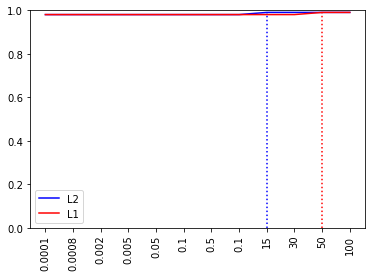

In [86]:
#plot the accuracy curve
plt.plot(range(0,len(lambda_vals)), l2_acc, color='b', label='L2')
plt.plot(range(0,len(lambda_vals)), l1_acc, color='r', label='L1')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(lambda_vals)), lambda_vals, rotation='vertical')

#Highlight the best values of alpha and lambda
plt.plot((max_index_l2, max_index_l2), (0, l2_acc[max_index_l2]), ls='dotted', color='b')
plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes=plt.gca()
axes.set_ylim([0,1.0])

plt.legend(loc="lower left")
plt.show()

In [158]:
#Import SGDRegressor:
from sklearn.linear_model import SGDRegressor 

#Define:
alpha_val=7

#Defie enet:
enet=SGDRegressor(loss='squared_loss', penalty='elasticnet', alpha=alpha_val, l1_ratio=0.7, max_iter=1000)
enet.fit(Dtrain[predictors],Dtrain[response].values.reshape((Dtrain[response].shape[0])))

#Define y_predict:
y_predict = enet.predict(Dtest[predictors])
y_predict = np.reshape(y_predict, np.shape(Dtest[response]))  

#Define and print MSE:
mse2 = np.mean((y_predict - Dtest[response])**2)           
print("The sum of squared distances between our target variable and predicted values is:{}".format(mse2[0]))
print()
print(y_predict)             
                 


The sum of squared distances between our target variable and predicted values is:3.418634332556642e+23

[[-7.17513285e+11]
 [-9.25685683e+11]
 [ 2.90597924e+10]
 ...
 [-6.62838039e+11]
 [-8.70586575e+11]
 [-6.77044645e+11]]


In [160]:
#Import SGDClassifier: 
from sklearn.linear_model import SGDClassifier 

#Define:
alpha_val=0.1

#Define enet:
enet1=SGDClassifier(loss='log', penalty='elasticnet', alpha=alpha_val, l1_ratio=0.7, max_iter=1000)
enet1.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0])))

#Define y_predict:
y_predict1=enet1.predict(Dtest[predictors])
#Define enet accuracy score:
enet_acc=accuracy_score(y_predict1, Dtest[response])

print(y_predict)
print()
print("Accuracy score is:{}".format(enet_acc))
print('The classifier accuracy is pretty good')

[[-7.17513285e+11]
 [-9.25685683e+11]
 [ 2.90597924e+10]
 ...
 [-6.62838039e+11]
 [-8.70586575e+11]
 [-6.77044645e+11]]

Accuracy score is:0.9860381531656068
The classifier accuracy is pretty good


In [161]:
#Prediction of accuracy by .score function:
ac = lr.score(Dtrain[predictors], Dtrain['precip_type'])
print('The prediction of accuracy by .score function:', ac)
print()
print(lr.predict_proba(Dtest[predictors]))

The prediction of accuracy by .score function: 0.9836633736688538

[[4.77343413e-07 9.99999523e-01]
 [5.02831420e-01 4.97168580e-01]
 [9.11781720e-01 8.82182795e-02]
 ...
 [2.12382930e-01 7.87617070e-01]
 [4.45125100e-04 9.99554875e-01]
 [5.91965565e-09 9.99999994e-01]]


In [138]:
#Import DecisionTreeClassifier:
from sklearn.tree import DecisionTreeClassifier

#Fitting:
clf = DecisionTreeClassifier(random_state = 2)
clf.fit(Dtrain[predictors], Dtrain[response])

#Prediction with the threshold equals to 0.45
y_pred = (clf.predict_proba(Dtest[predictors])[:,1] >= 0.45).astype(bool)
y_pred

array([ True,  True, False, ...,  True,  True,  True])

 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

In [141]:
#Install:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already up-to-date: scikit-learn in c:\users\asus\anaconda3\lib\site-packages (0.23.2)



In [171]:
#Import the confusion matrix:
from sklearn.metrics import confusion_matrix

#Confusion matrix:
conf_m = confusion_matrix(Dtest[response], y_pred, labels=None, sample_weight=None, normalize=None)
print('''
The confusion matrix is:
''')
conf_m



The confusion matrix is:



array([[ 3282,    87],
       [   92, 25475]], dtype=int64)

In [179]:
#Define true positve, false positive, false negative and true negative:
TP = conf_m[0,0]
FP = conf_m[0,1]
FN = conf_m[1,0]
TN = conf_m[1,1]

print('There are', FP, 'type I errors')
print('There are', FN, 'type II errors')

There are 87 type I errors
There are 92 type II errors


In [180]:
#Calculate precision, recall and accuracy:

precision = np.sum(TP / (TP + FP))
recall = np.sum(TP/ (TP + FN))
accuracy = (TP + TN)/(TP+FP+FN+TN)

print('The precision is:', precision)
print('The recall is:', recall)
print('The accuracy is:', accuracy)

print('''
The test performance has higher than average, pretty good precision.
The precision shows that when the classifier predict 1 or rain, it is true in cases.
The model has a high recall where it predicts 97.3% of the positive class predictions correctly.
The recall is good since it is over 0.5
The high accuracy the model is highly correct or it may mean that it is inbalanced.
''')

The precision is: 0.9741763134461264
The recall is: 0.972732661529342
The accuracy is: 0.993813934199613

The test performance has higher than average, pretty good precision.
The precision shows that when the classifier predict 1 or rain, it is true in cases.
The model has a high recall where it predicts 97.3% of the positive class predictions correctly.
The recall is good since it is over 0.5
The high accuracy the model is highly correct or it may mean that it is inbalanced.



##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

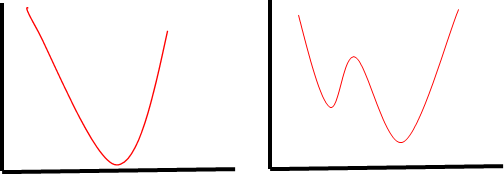





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)

In [181]:
#a. Which of the above figures represents the convex objective function and why?
print('''
The graph a on the left is a convex objective function and the graph b on the right is a non-convex function 
since it curves up and down and have multiple locally optimal points.

Also it can be seen that the convex function on the left deal with only one optimal solution, which is globally optimal.
''')


The graph a on the left is a convex objective function and the graph b on the right is a non-convex function 
since it curves up and down and have multiple locally optimal points.

Also it can be seen that the convex function on the left deal with only one optimal solution, which is globally optimal.



In [182]:
#b. Which hyper-parameter can help to reach the convergence point and the impact of value selection?
print('''
The right lambda as hyperparameter can prevent underfit(if too high) and overfit, then reach convergence point and it also
impact value selection.
''')


The right lambda as hyperparameter can prevent underfit(if too high) and overfit, then reach convergence point and it also
impact value selection.



In [183]:
#c. How can we find the global minima for the objective function shown in Figure-b? [N.B. Conceptual description will be accepted.]
print('''

|  \                        /
|   \       _              /
|    \     / \            /
|     \   /   \          /          
|      \_/     \        /
|               \      /
|                \    /
|       ^         \__/
|       |->local
|         minima    ^    
|                   |->global       
|                      minima 
|________________________________


The global minima is the lowest(deepest) of all minimum.
The scipy.optimize.minimize function can be used to find the global minima in python.
The minimum or maximum is where the derivative of a function changes its direction.
We need to repeat the  random initialisation process few times.
''')



|  \                        /
|   \       _              /
|    \     / \            /
|     \   /   \          /          
|      \_/     \        /
|               \      /
|                \    /
|       ^         \__/
|       |->local
|         minima    ^    
|                   |->global       
|                      minima 
|________________________________


The global minima is the lowest(deepest) of all minimum.
The scipy.optimize.minimize function can be used to find the global minima in python.
The minimum or maximum is where the derivative of a function changes its direction.
We need to repeat the  random initialisation process few times.

